# Импорт библиотек

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score,recall_score,accuracy_score,fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin
import warnings
import time
from sklearn.exceptions import ConvergenceWarning

# 1. Загрузите датасет Olivetti faces

In [42]:
df = fetch_20newsgroups(subset='all')

# 3 Выведите информацию о количественных параметрах датасета;

In [6]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [43]:
X = df['data'][:1000]
y = df['target'][:1000]

# 4 Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [57]:
print(X[10],y[10])

From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: 14 Apr 93   God's Promise in 1 John 1: 7
Organization: Cookamunga Tourist Bureau
Lines: 17

In article <1qknu0INNbhv@shelley.u.washington.edu>, > Christian:  washed in
the blood of the lamb.
> Mithraist:  washed in the blood of the bull.
> 
> If anyone in .netland is in the process of devising a new religion,
> do not use the lamb or the bull, because they have already been
> reserved.  Please choose another animal, preferably one not
> on the Endangered Species List.  

This will be a hard task, because most cultures used most animals
for blood sacrifices. It has to be something related to our current
post-modernism state. Hmm, what about used computers?

Cheers,
Kent
---
sandvik@newton.apple.com. ALink: KSAND -- Private activities on the net.
 19


# 5. Разделите эти данные на тестовую и обучающую выборки


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
Counter(y)

Counter({10: 57,
         3: 59,
         17: 44,
         4: 57,
         12: 58,
         19: 43,
         11: 45,
         13: 50,
         0: 46,
         8: 51,
         7: 42,
         5: 68,
         1: 56,
         14: 50,
         16: 41,
         6: 42,
         9: 49,
         18: 34,
         2: 54,
         15: 54})

# 6. Постройте модель классификации для определения заболевания

In [48]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [49]:
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('to_dense', DenseTransformer()), 
                     ('model', GaussianNB())])

In [50]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 7 Оцените качество модели на тестовой выборке с помощью следующих метрик:
# достоверность предсказания (accuracy);
# точность (precision);
# полнота (recall);
# 8 Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей #выборки.


In [51]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [54]:
metrics = {}

{'accuracy': 0.595, 'precision': 0.6515153792286145, 'recall': 0.595, 'f1': 0.5868695716633865, 'f0.5': 0.6068337712490881, 'f2': 0.5860975692980849}


<module 'matplotlib.pyplot' from 'C:\\Users\\Vladc\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

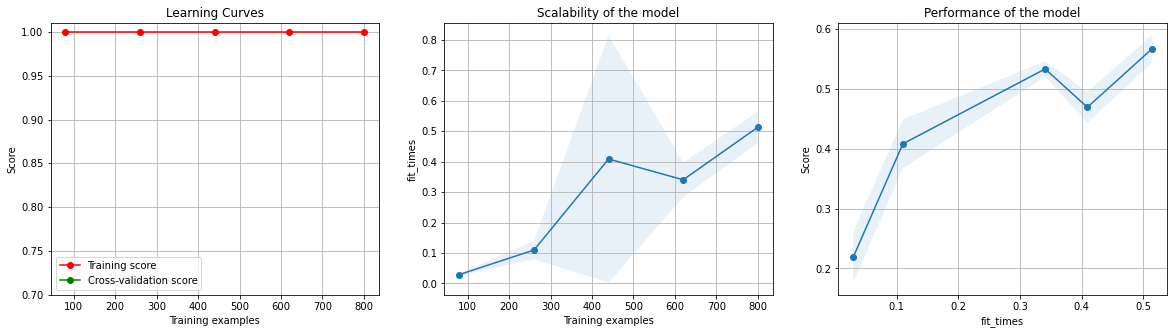

In [55]:
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('to_dense', DenseTransformer()), 
                     ('model', GaussianNB())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['SVC'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['SVC'])


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

# 9. Сделайте вывод о применимости модели.

In [15]:
#по всем метрикам модель очень неплохая

# Дополнительные задания
# 1 Постройте модели классификации на основе следующих методов:
# логистическая регрессия (LogisticRegression);
# метод опорных векторов с гауссовым ядром (SVC);
# метод опорных векторов с полиномиальным ядром (SVC);
# метод k ближайших соседей (KNeighborsClassifier);
# многослойный перцептрон (MLP);


GaussianNB()
{'accuracy': 0.595, 'precision': 0.6515153792286145, 'recall': 0.595, 'f1': 0.5868695716633865, 'f0.5': 0.6068337712490881, 'f2': 0.5860975692980849, 'time': 1.6680800914764404}


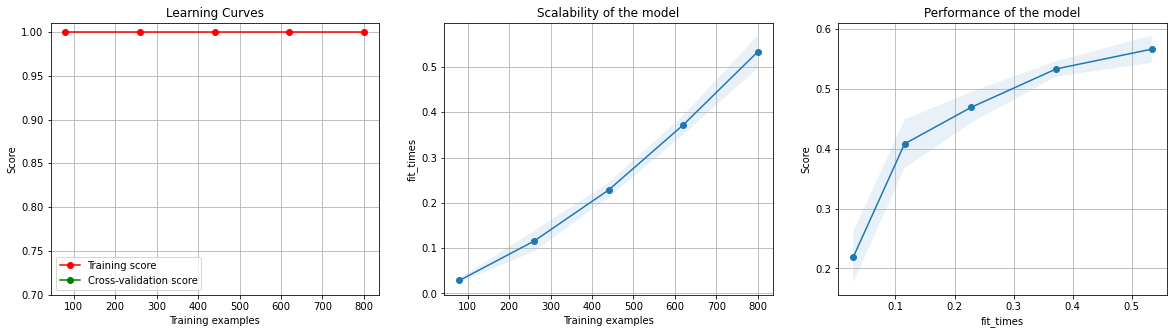

SVC(kernel ="poly",max_iter = 1000)


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.14, 'precision': 0.4066575091575092, 'recall': 0.14, 'f1': 0.14082751085989428, 'f0.5': 0.21886767148345634, 'f2': 0.11286556205209154, 'time': 9.043608903884888}


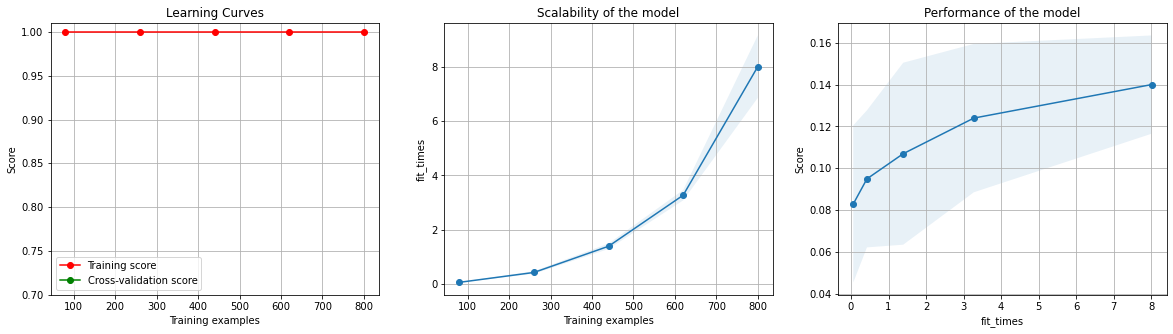

MLPClassifier()
{'accuracy': 0.705, 'precision': 0.7722895021645022, 'recall': 0.705, 'f1': 0.715209042358116, 'f0.5': 0.742264101924249, 'f2': 0.7030372998156286, 'time': 76.94640636444092}


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

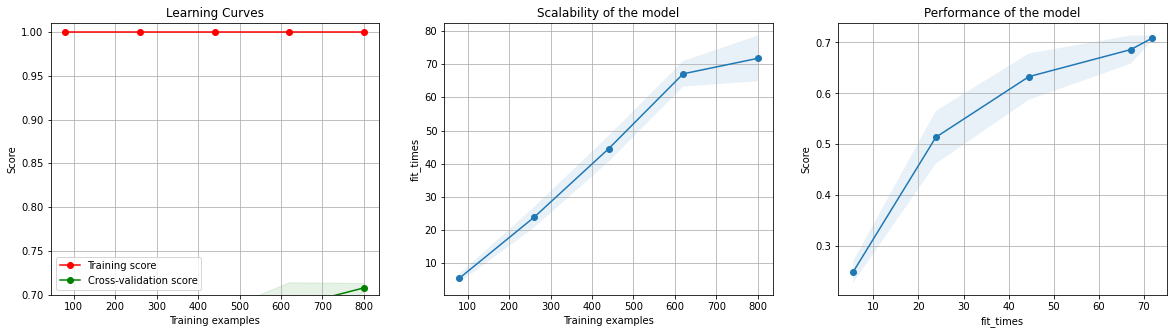

KNeighborsClassifier()
{'accuracy': 0.48, 'precision': 0.5008443626266207, 'recall': 0.48, 'f1': 0.4660086511219327, 'f0.5': 0.4803155628275044, 'f2': 0.4670136321325968, 'time': 0.36808300018310547}


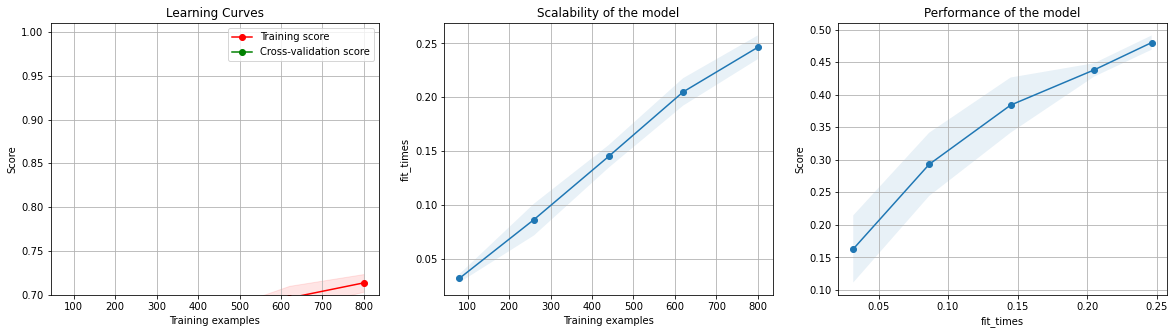

SVC(kernel ="rbf",max_iter = 1000)


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.47, 'precision': 0.7323767107540842, 'recall': 0.47, 'f1': 0.4691045960575371, 'f0.5': 0.554964850541496, 'f2': 0.4463852729293436, 'time': 8.757972717285156}


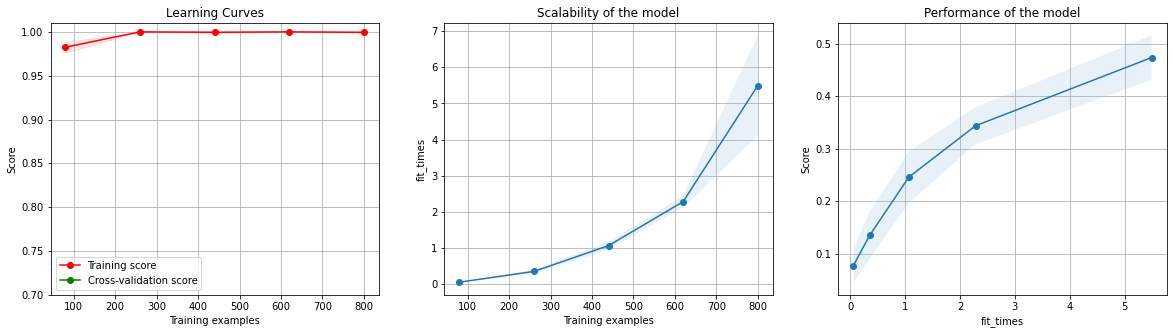

LogisticRegression(max_iter = 1000)
{'accuracy': 0.575, 'precision': 0.7461836146309831, 'recall': 0.575, 'f1': 0.5581597854121108, 'f0.5': 0.6138915418083836, 'f2': 0.5516001516923174, 'time': 4.55596399307251}


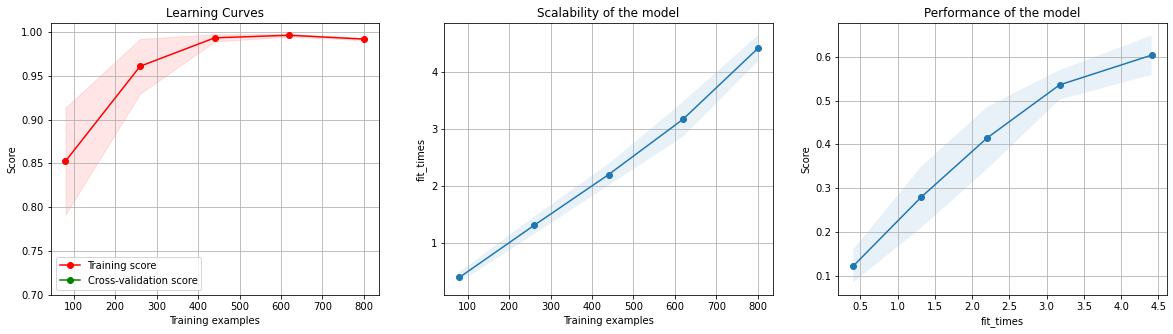

In [58]:
models = ['GaussianNB()','SVC(kernel ="poly",max_iter = 1000)','MLPClassifier()',\
          'KNeighborsClassifier()'\
          ,'SVC(kernel ="rbf",max_iter = 1000)','LogisticRegression(max_iter = 1000)']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                         ('to_dense', DenseTransformer()), 
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])


    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    title = "Learning Curves"
    plot = plot_learning_curve(
        pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
    )
    plot.show()

# 2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


In [59]:
pd.DataFrame(metrics)

,GaussianNB(),"SVC(kernel =""poly"",max_iter = 1000)",MLPClassifier(),KNeighborsClassifier(),"SVC(kernel =""rbf"",max_iter = 1000)",LogisticRegression(max_iter = 1000)
accuracy,0.595000,0.140000,0.705000,0.480000,0.470000,0.575000
precision,0.651515,0.406658,0.772290,0.500844,0.732377,0.746184
recall,0.595000,0.140000,0.705000,0.480000,0.470000,0.575000
f1,0.586870,0.140828,0.715209,0.466009,0.469105,0.558160
f0.5,0.606834,0.218868,0.742264,0.480316,0.554965,0.613892
f2,0.586098,0.112866,0.703037,0.467014,0.446385,0.551600
time,1.668080,9.043609,76.946406,0.368083,8.757973,4.555964


In [60]:
#по всем метрикам логичтическая регрессия оказалось наилучшией, тем не менее эффективность страдает
#обучение выполняется в дестяки раз дольше, чем в случае с др/угими моделями

# 5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [61]:
C = np.linspace(1,3,5)
f2 = []
recall = []
for i in C:
    model = Pipeline([('vectorizer', TfidfVectorizer()),
                         ('to_dense', DenseTransformer()), 
                         ('model', LogisticRegression(C = i,max_iter = 1000))])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall.append(recall_score(y_test, y_pred, average ='weighted'))

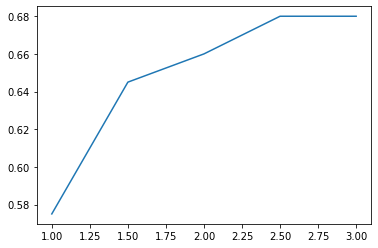

In [62]:
plt.plot(C,recall)

In [63]:
accuracy_score(y_test, y_pred)

0.68

In [64]:
precision_score(y_test, y_pred, average ='weighted')

0.7700084845709846